In [283]:
import numpy as np
import math

In [284]:
class FuzzyEntropy():
    def __init__(self):
        pass
    def calc_alpha(self,d_dash):
        return (np.log(2)/d_dash)
    def Ecledian_distance(self,samples):
        distances = []
        for i in samples:
            subdistance = []
            for j in samples:
                distance = np.sqrt(((i - j)**2).sum())
                subdistance.append(distance)
            distances.append(subdistance)
        return np.array(distances)
    
    def similarities(self,distances,alpha):
        similarities = np.exp(- distances* alpha)
        return np.array(similarities)
    
    def entropies(self,similarities):
        entropies = []
        for i in range(len(similarities)):
            i_entropy=0
            for j in range(len(similarities[i])):
                if i!=j:
                    i_entropy += (similarities[i][j]*np.log2(similarities[i][j]))+((1-similarities[i][j])*np.log2(1-similarities[i][j]))
            entropies.append(-i_entropy)
        return np.array(entropies)
    def get_next_entropy(self,sampels,entropies):
        sorted_indices = np.argsort(entropies)
        for i in range(len(sorted_indices)):
            if not sampels[sorted_indices[i]][1]:
                return sorted_indices[i]
            
    
    def fit(self,sampels,s=0.5):
        distance =self.Ecledian_distance(sampels)
        print("distances: \n",distance)
        d_dash = distance.mean()
        print("d_dash: ",d_dash)
        alpha = self.calc_alpha(d_dash)
        print("alpha: ",alpha)
        similarities = self.similarities(distance,alpha)
        print("similarities:\n",similarities)
        entropies = self.entropies(similarities)
        print("entropies:\n",entropies)
        selected_entropy = np.argmin(entropies)
        print("Minimum entropy index: ",selected_entropy," with: ",entropies[0])
        i= 0
        sampels=[[t, False] for t in sampels]
        dictainary= {}
        
        while True:
            class_name = "class "+str(i)

            i= i+1
            dictainary[class_name] ={
                "class_centroid": sampels[selected_entropy][0]
            }
            sampels[selected_entropy][1]= True
            data = []
            for similarity_i in range(len(similarities[selected_entropy])):
                similarity = similarities[selected_entropy][similarity_i]
                if similarity>= s and not sampels[similarity_i][1]:
                    data.append(sampels[similarity_i][0])
                    sampels[similarity_i][1]=True
            
            dictainary[class_name]["data"]= data
            selected_entropy = self.get_next_entropy(sampels,entropies)
            finished= True

            for t in sampels:
                if not t[1]:
                   finished= False
                   break

            if finished: 
                print("im done")
                break
        return dictainary
            


In [285]:
# data= np.array([[0.2,0.4,0.6],
#        [0.4,0.3,0.8],
#        [0.8,0.2,0.5],
#        [0.9,0.5,0.4],
#        [0.6,0.6,0.6],
#        [0.3,0.4,0.5],
#        [0.7,0.6,0.5],
#        [0.2,0.5,0.3],
#        [0.3,0.6,0.8],
#        [0.8,0.3,0.1]])

In [286]:
data = np.random.normal(10,1, size=(50,2))
data = np.append(data, np.random.normal(5,1, size=(50,2)),axis=0)
len(data)

100

In [287]:
model = FuzzyEntropy()
X = model.fit(data,0.6)

distances: 
 [[ 0.          2.7642723   2.35174168 ... 10.23653412  7.44864514
   7.2916869 ]
 [ 2.7642723   0.          0.94212192 ...  9.89262615  7.34616725
   6.33597297]
 [ 2.35174168  0.94212192  0.         ...  9.13069083  6.51634149
   5.69576379]
 ...
 [10.23653412  9.89262615  9.13069083 ...  0.          2.80557629
   3.79507915]
 [ 7.44864514  7.34616725  6.51634149 ...  2.80557629  0.
   2.30992638]
 [ 7.2916869   6.33597297  5.69576379 ...  3.79507915  2.30992638
   0.        ]]
d_dash:  4.551215167026326
alpha:  0.15229936514138354
similarities:
 [[1.         0.65639213 0.69895511 ... 0.2103426  0.32160734 0.32938787]
 [0.65639213 1.         0.86633417 ... 0.22165333 0.32666614 0.38099666]
 [0.69895511 0.86633417 1.         ... 0.2489263  0.37067312 0.42001653]
 ...
 [0.2103426  0.22165333 0.2489263  ... 1.         0.652276   0.56102593]
 [0.32160734 0.32666614 0.37067312 ... 0.652276   1.         0.70342057]
 [0.32938787 0.38099666 0.42001653 ... 0.56102593 0.70342057 1.

In [288]:
X

{'class 0': {'class_centroid': array([4.91806089, 4.53215683]),
  'data': [array([6.07598595, 5.72769648]),
   array([4.62264517, 4.95693141]),
   array([5.20428313, 4.64602288]),
   array([5.22533704, 4.99493197]),
   array([4.50149618, 4.12059952]),
   array([4.3648518 , 6.14207718]),
   array([6.552896  , 3.30892568]),
   array([3.9990346 , 4.59193122]),
   array([2.79986466, 4.75561602]),
   array([6.07973714, 4.13037627]),
   array([2.94390394, 6.22918198]),
   array([5.4355439 , 4.49431969]),
   array([4.51305591, 4.15917995]),
   array([3.28679633, 7.11212648]),
   array([4.21507565, 4.5998553 ]),
   array([4.99189195, 4.93529388]),
   array([5.03305482, 4.62710667]),
   array([4.83506422, 5.79687905]),
   array([5.80846353, 5.2732909 ]),
   array([5.12861176, 6.35449674]),
   array([3.98574713, 7.04764663]),
   array([6.06478517, 4.08854772]),
   array([4.87164178, 4.97492215]),
   array([5.59393812, 6.26632623]),
   array([5.45375626, 4.38708985]),
   array([7.44544197, 2.9573

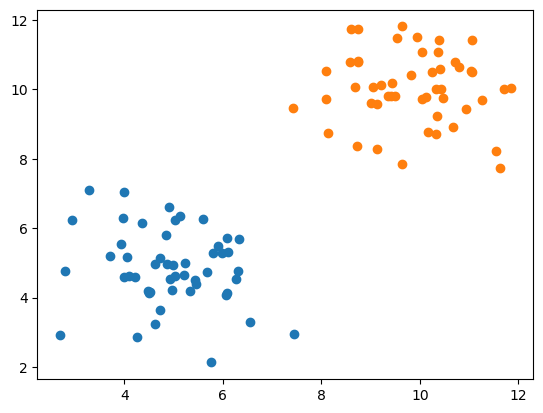

In [289]:
import matplotlib.pyplot as plt

for data_i in X.values():
    final_data=[data_i["class_centroid"]]
    final_data.extend(data_i["data"])
    final_data= np.array(final_data)
    plt.scatter(final_data[:,0],final_data[:,1])
plt.show()